# Ch10: Intorduction to Artificial Neural Networks

* [The Perceptron](#The-Perceptron)
* [MNIST](#MNIST)
* [Training an MLP with TensorFlow's High-Level API](#Training-an-MLP-with-TensorFlow's-High-Level-API)
* [Training a DNN Using Plain TensorFlow](#Training-a-DNN-Using-Plain-TensorFlow)
	* [Construction Phase](#Construction-Phase)
	* [Execution Phase](#Execution-Phase)
	* [Using the Neural Network](#Using-the-Neural-Network)


## The Perceptron

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)
per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)
y_pred=per_clf.predict([[2,0.5]])

E:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## MNIST

In [12]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')

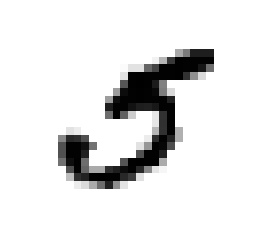

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
X,y=mnist["data"],mnist["target"]
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
y[36000]

5.0

In [15]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

## Training an MLP with TensorFlow's High-Level API

In [18]:
import tensorflow as tf
feature_column=tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

In [28]:
y_train=y_train.astype(np.int)

In [29]:
type(y_train[0])

numpy.int32

In [30]:
dnn_clf=tf.contrib.learn.DNNClassifier(hidden_units=[300,100],n_classes=10,feature_columns=feature_column)
dnn_clf.fit(x=X_train,y=y_train,batch_size=50,steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D4F5248978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\ZHF\\AppData\\Local\\Temp\\tmpmjhadyba'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions

INFO:tensorflow:loss = 0.351983, step = 5301 (0.302 sec)
INFO:tensorflow:global_step/sec: 342.729
INFO:tensorflow:loss = 0.709864, step = 5401 (0.291 sec)
INFO:tensorflow:global_step/sec: 336.939
INFO:tensorflow:loss = 0.25736, step = 5501 (0.297 sec)
INFO:tensorflow:global_step/sec: 349.945
INFO:tensorflow:loss = 0.198092, step = 5601 (0.286 sec)
INFO:tensorflow:global_step/sec: 341.555
INFO:tensorflow:loss = 0.143908, step = 5701 (0.292 sec)
INFO:tensorflow:global_step/sec: 343.91
INFO:tensorflow:loss = 0.116049, step = 5801 (0.292 sec)
INFO:tensorflow:global_step/sec: 342.729
INFO:tensorflow:loss = 0.202115, step = 5901 (0.293 sec)
INFO:tensorflow:global_step/sec: 301.31
INFO:tensorflow:loss = 0.153353, step = 6001 (0.331 sec)
INFO:tensorflow:global_step/sec: 341.557
INFO:tensorflow:loss = 0.408857, step = 6101 (0.293 sec)
INFO:tensorflow:global_step/sec: 314.619
INFO:tensorflow:loss = 0.136886, step = 6201 (0.318 sec)
INFO:tensorflow:global_step/sec: 342.729
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 347.506
INFO:tensorflow:loss = 0.136112, step = 13701 (0.288 sec)
INFO:tensorflow:global_step/sec: 354.925
INFO:tensorflow:loss = 0.113968, step = 13801 (0.282 sec)
INFO:tensorflow:global_step/sec: 348.71
INFO:tensorflow:loss = 0.202671, step = 13901 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.188
INFO:tensorflow:loss = 0.502098, step = 14001 (0.285 sec)
INFO:tensorflow:global_step/sec: 353.667
INFO:tensorflow:loss = 0.0995394, step = 14101 (0.283 sec)
INFO:tensorflow:global_step/sec: 354.926
INFO:tensorflow:loss = 0.206747, step = 14201 (0.282 sec)
INFO:tensorflow:global_step/sec: 352.417
INFO:tensorflow:loss = 0.216296, step = 14301 (0.283 sec)
INFO:tensorflow:global_step/sec: 345.1
INFO:tensorflow:loss = 0.180564, step = 14401 (0.291 sec)
INFO:tensorflow:global_step/sec: 351.177
INFO:tensorflow:loss = 0.116878, step = 14501 (0.286 sec)
INFO:tensorflow:global_step/sec: 353.667
INFO:tensorflow:loss = 0.0538583, step = 14601 (0.282 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 345.1
INFO:tensorflow:loss = 0.0219412, step = 22001 (0.290 sec)
INFO:tensorflow:global_step/sec: 361.356
INFO:tensorflow:loss = 0.0406301, step = 22101 (0.277 sec)
INFO:tensorflow:global_step/sec: 354.926
INFO:tensorflow:loss = 0.107153, step = 22201 (0.282 sec)
INFO:tensorflow:global_step/sec: 356.193
INFO:tensorflow:loss = 0.2012, step = 22301 (0.281 sec)
INFO:tensorflow:global_step/sec: 354.925
INFO:tensorflow:loss = 0.17968, step = 22401 (0.282 sec)
INFO:tensorflow:global_step/sec: 357.469
INFO:tensorflow:loss = 0.296959, step = 22501 (0.280 sec)
INFO:tensorflow:global_step/sec: 357.47
INFO:tensorflow:loss = 0.28689, step = 22601 (0.280 sec)
INFO:tensorflow:global_step/sec: 346.282
INFO:tensorflow:loss = 0.0303298, step = 22701 (0.288 sec)
INFO:tensorflow:global_step/sec: 349.96
INFO:tensorflow:loss = 0.172502, step = 22801 (0.286 sec)
INFO:tensorflow:global_step/sec: 357.471
INFO:tensorflow:loss = 0.190038, step = 22901 (0.281 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 345.1
INFO:tensorflow:loss = 0.14576, step = 30301 (0.290 sec)
INFO:tensorflow:global_step/sec: 358.757
INFO:tensorflow:loss = 0.0502791, step = 30401 (0.279 sec)
INFO:tensorflow:global_step/sec: 354.926
INFO:tensorflow:loss = 0.0676224, step = 30501 (0.282 sec)
INFO:tensorflow:global_step/sec: 349.944
INFO:tensorflow:loss = 0.132526, step = 30601 (0.286 sec)
INFO:tensorflow:global_step/sec: 330.246
INFO:tensorflow:loss = 0.167703, step = 30701 (0.303 sec)
INFO:tensorflow:global_step/sec: 358.756
INFO:tensorflow:loss = 0.174869, step = 30801 (0.279 sec)
INFO:tensorflow:global_step/sec: 356.193
INFO:tensorflow:loss = 0.158009, step = 30901 (0.281 sec)
INFO:tensorflow:global_step/sec: 351.176
INFO:tensorflow:loss = 0.0343492, step = 31001 (0.284 sec)
INFO:tensorflow:global_step/sec: 352.418
INFO:tensorflow:loss = 0.0865335, step = 31101 (0.285 sec)
INFO:tensorflow:global_step/sec: 353.667
INFO:tensorflow:loss = 0.197785, step = 31201 (0.283 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 340.39
INFO:tensorflow:loss = 0.108256, step = 38601 (0.293 sec)
INFO:tensorflow:global_step/sec: 348.72
INFO:tensorflow:loss = 0.0968823, step = 38701 (0.288 sec)
INFO:tensorflow:global_step/sec: 340.39
INFO:tensorflow:loss = 0.171218, step = 38801 (0.293 sec)
INFO:tensorflow:global_step/sec: 352.417
INFO:tensorflow:loss = 0.138008, step = 38901 (0.284 sec)
INFO:tensorflow:global_step/sec: 347.504
INFO:tensorflow:loss = 0.146965, step = 39001 (0.288 sec)
INFO:tensorflow:global_step/sec: 349.946
INFO:tensorflow:loss = 0.16442, step = 39101 (0.286 sec)
INFO:tensorflow:global_step/sec: 340.389
INFO:tensorflow:loss = 0.124374, step = 39201 (0.295 sec)
INFO:tensorflow:global_step/sec: 340.389
INFO:tensorflow:loss = 0.0652574, step = 39301 (0.293 sec)
INFO:tensorflow:global_step/sec: 360.051
INFO:tensorflow:loss = 0.0752883, step = 39401 (0.278 sec)
INFO:tensorflow:global_step/sec: 351.169
INFO:tensorflow:loss = 0.00899642, step = 39501 (0.285 sec)
INFO:tens

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000002D4F5248630>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.uint8, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x000002D4F0B886A8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [32]:
from sklearn.metrics import accuracy_score
y_pred=list(dnn_clf.predict(X_test))
accuracy_score(y_test,y_pred)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from C:\Users\ZHF\AppData\Local\Temp\tmpmjhadyba\model.ckpt-40000


0.94969999999999999

In [34]:
y_test=y_test.astype(int)

In [35]:
dnn_clf.evaluate(X_test,y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2018-01-26-08:33:14
INFO

{'accuracy': 0.9497, 'global_step': 40000, 'loss': 0.27492353}

## Training a DNN Using Plain TensorFlow

### Construction Phase

In [44]:

import tensorflow as tf
n_inputs=28*28
n_hidden1=300
n_hidden2=100
n_outputs=10
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
y=tf.placeholder(tf.int64,shape=(None),name="y")

from datetime import datetime
def write_graph(graph):
    now=datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir="tf_logs"
    logdir="{}/run-{}/".format(root_logdir,now)
    file_writer=tf.summary.FileWriter(logdir,graph)
    file_writer=tf.summary.FileWriter(logdir,graph)
    print("Write graph:",logdir)

def neuron_layer(X,n_neurons,name,activation=None):
    with tf.name_scope(name):
        n_inputs=int(X.get_shape()[1])
        stddev=2/np.sqrt(n_inputs)
        init=tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)
        W=tf.Variable(init,name="weights")
        b=tf.Variable(tf.zeros([n_neurons]),name="biases")
        z=tf.matmul(X,W)+b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

In [45]:
with tf.name_scope("dnn"):
    hidden1=neuron_layer(X,n_hidden1,"hidden1",activation="relu")
    hidden2=neuron_layer(hidden1,n_hidden2,"hidden2",activation="relu")
    logits=neuron_layer(hidden2,n_outputs,"outputs")

In [46]:
write_graph(tf.get_default_graph())

Write graph: tf_logs/run-20180126084954/


In [49]:
from tensorflow.contrib.layers import fully_connected
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
y=tf.placeholder(tf.int64,shape=(None),name="y")
with tf.name_scope("dnn"):
    hidden1=fully_connected(X,n_hidden1,scope="hidden1")
    hidden2=fully_connected(hidden1,n_hidden2,scope="hidden2")
    logits=fully_connected(hidden2,n_outputs,scope="outputs",activation_fn=None)


In [50]:
write_graph(tf.get_default_graph())

Write graph: tf_logs/run-20180126085314/


In [52]:
with tf.name_scope("loss"):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss=tf.reduce_mean(xentropy,name="loss")

In [53]:
learning_rate=0.01
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate)
    training_op=optimizer.minimize(loss)

In [54]:
with tf.name_scope("eval"):
    correct=tf.nn.in_top_k(logits,y,1)
    accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))

In [55]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

### Execution Phase

In [56]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [60]:
n_epochs=200
batch_size=50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        acc_train=accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test=accuracy.eval(feed_dict={X:mnist.test.images,y:mnist.test.labels})
        print(epoch,"Train accuracy:",acc_train,"Test accuracy:",acc_test)
        save_path=saver.save(sess,"./ch10_model_final.ckpt")

0 Train accuracy: 0.94 Test accuracy: 0.9046
1 Train accuracy: 0.96 Test accuracy: 0.9218
2 Train accuracy: 0.92 Test accuracy: 0.9294
3 Train accuracy: 0.92 Test accuracy: 0.937
4 Train accuracy: 0.96 Test accuracy: 0.9419
5 Train accuracy: 0.96 Test accuracy: 0.9442
6 Train accuracy: 0.94 Test accuracy: 0.9483
7 Train accuracy: 0.96 Test accuracy: 0.9518
8 Train accuracy: 0.94 Test accuracy: 0.9557
9 Train accuracy: 1.0 Test accuracy: 0.958
10 Train accuracy: 0.96 Test accuracy: 0.9619
11 Train accuracy: 0.96 Test accuracy: 0.9633
12 Train accuracy: 0.96 Test accuracy: 0.9634
13 Train accuracy: 0.96 Test accuracy: 0.9661
14 Train accuracy: 1.0 Test accuracy: 0.9662
15 Train accuracy: 0.98 Test accuracy: 0.9672
16 Train accuracy: 1.0 Test accuracy: 0.9684
17 Train accuracy: 1.0 Test accuracy: 0.9686
18 Train accuracy: 1.0 Test accuracy: 0.9689
19 Train accuracy: 1.0 Test accuracy: 0.9702
20 Train accuracy: 1.0 Test accuracy: 0.9718
21 Train accuracy: 0.96 Test accuracy: 0.9711
22 Trai

181 Train accuracy: 1.0 Test accuracy: 0.9808
182 Train accuracy: 1.0 Test accuracy: 0.9806
183 Train accuracy: 1.0 Test accuracy: 0.9805
184 Train accuracy: 1.0 Test accuracy: 0.9805
185 Train accuracy: 1.0 Test accuracy: 0.9804
186 Train accuracy: 1.0 Test accuracy: 0.9808
187 Train accuracy: 1.0 Test accuracy: 0.9808
188 Train accuracy: 1.0 Test accuracy: 0.9805
189 Train accuracy: 1.0 Test accuracy: 0.9804
190 Train accuracy: 1.0 Test accuracy: 0.9807
191 Train accuracy: 1.0 Test accuracy: 0.9803
192 Train accuracy: 1.0 Test accuracy: 0.9804
193 Train accuracy: 1.0 Test accuracy: 0.9806
194 Train accuracy: 1.0 Test accuracy: 0.9807
195 Train accuracy: 1.0 Test accuracy: 0.9805
196 Train accuracy: 1.0 Test accuracy: 0.9805
197 Train accuracy: 1.0 Test accuracy: 0.9807
198 Train accuracy: 1.0 Test accuracy: 0.9807
199 Train accuracy: 1.0 Test accuracy: 0.9805


### Using the Neural Network

In [66]:
mnist.test.images[0].reshape(-1,784).shape

(1, 784)

In [67]:
with tf.Session() as sess:
    saver.restore(sess,"./ch10_model_final.ckpt")
    X_new_scaled=mnist.test.images[0].reshape(-1,784)
    Z=logits.eval(feed_dict={X:X_new_scaled})
    y_pred=np.argmax(Z,axis=1)

INFO:tensorflow:Restoring parameters from ./ch10_model_final.ckpt


In [68]:
y_pred

array([7], dtype=int64)

In [69]:
+mnist.test.labels[0]

7